<a href="https://colab.research.google.com/github/SrikantKonduri/SMAI-Project/blob/Sumit/Copy_of_Copy_of_Copy_of_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np

# Define radius and center of circle
r = 1
center = (0, 0)

# Define angle range for circle
theta = np.linspace(0, 2*np.pi, 20)

# Generate coordinates for points on circle
x = center[0] + r*np.cos(theta)
y = center[1] + r*np.sin(theta)

# Combine x and y into a single array
data = np.stack((x, y), axis=1)

# Assign alternating labels
labels = np.ones(20)
labels[1::2] = -1
labels=np.asarray([float(i) for i in labels])
print("Data:\n", data)
print("Labels:\n", labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data with different colors for each label
plt.scatter(data[:,0], data[:,1], c=labels, cmap='coolwarm')
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import torch.nn.init as init

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP,self).__init__()
        # code here
        self.mlp1=nn.Linear(2,1000)
        self.mlp2=nn.Linear(1000,1000)
        self.mlp3=nn.Linear(1000,1)
        self.l4=nn.Sigmoid()
        self.double()
        init.normal_(self.mlp1.weight, mean=0, std=0.0001)
        init.kaiming_uniform_(self.mlp2.weight)
        init.kaiming_uniform_(self.mlp3.weight)
        init.constant_(self.mlp2.bias, 0)
        init.constant_(self.mlp3.bias, 0)
    def forward(self,x):
        # code here
        output=torch.relu(self.mlp1(x))
        output=torch.relu(self.mlp2(output))
        output=self.mlp3(output)
        output=self.l4(output)
        return output
model=SimpleMLP().to(device)

In [ ]:
optim_sgd_moment=torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [ ]:
dataset = MyDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=20,shuffle=True)

In [ ]:
for i in dataloader:
  output=model(i[0])
  print(output.squeeze(dim=0))
  

In [ ]:
n_epochs=1000
epochs=tqdm(range(n_epochs))
training_loss_sgd=[]
for epoch in epochs:
  train_loss=[]
  model.train()
  for batch in dataloader:
    optim_sgd_moment.zero_grad()
    images=batch[0].to(device)
    label=batch[1].to(device)
    output=model(images)
    #print(output.dtype)
    loss=nn.BCELoss()(output.squeeze(),label)
    loss.backward()
    optim_sgd_moment.step()
    train_loss.append(loss.item())
  loss_now=np.mean(train_loss)
  training_loss_sgd.append(loss_now)
  epochs.set_postfix({'loss':loss_now}) 

100%|██████████| 1000/1000 [00:08<00:00, 115.51it/s, loss=-.000705]


In [ ]:
num_samples = 50

In [ ]:
x_recons = torch.randn(num_samples, 2,dtype=torch.float64) #creating random x 
l=torch.rand(num_samples)#creating random lamdas for respective x
x_recons.requires_grad_(True)
l.requires_grad_(True)
opt_x_recons = torch.optim.Adam([x_recons], lr=0.2821179669627431) #making it optimising variable
opt_l=torch.optim.Adam([l],lr=0.2821179669627431) #making it optimising variable

In [ ]:
y = torch.ones(50)
y[:25] =-1

In [ ]:
x_recons.dtype

torch.float64

In [ ]:
values=model(x_recons.to(device))

In [ ]:
values=values.reshape(-1)

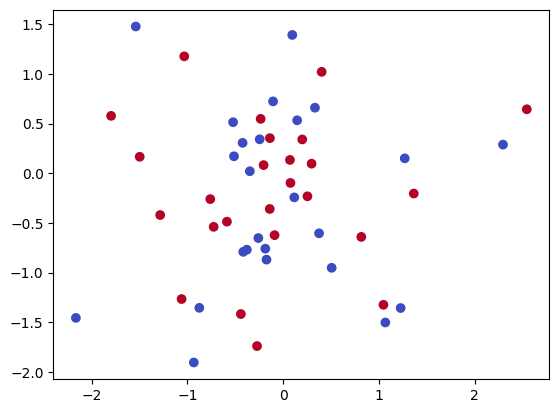

In [ ]:
 #before
plt.scatter(x_recons[:,0].detach().numpy(), x_recons[:,1].detach().numpy(), c=y, cmap='coolwarm')
plt.show()

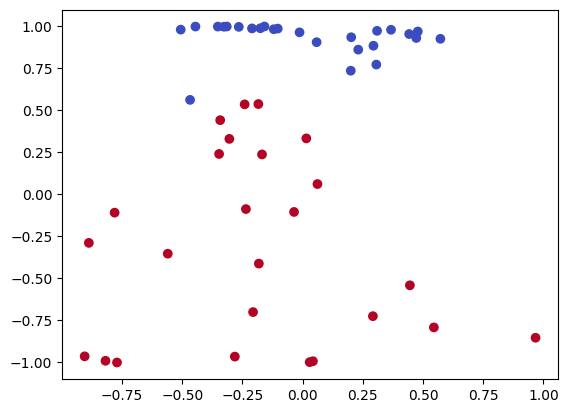

In [ ]:
plt.scatter(x_recons[:,0].detach().numpy(), x_recons[:,1].detach().numpy(), c=y, cmap='coolwarm')
plt.show() #exp3 using two losses and m=50

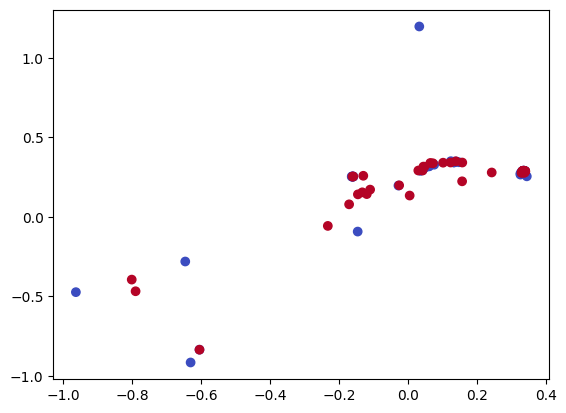

In [ ]:
plt.scatter(x_recons[:,0].detach().numpy(), x_recons[:,1].detach().numpy(), c=y, cmap='coolwarm')
plt.show() #after exp1 used only kkt loss

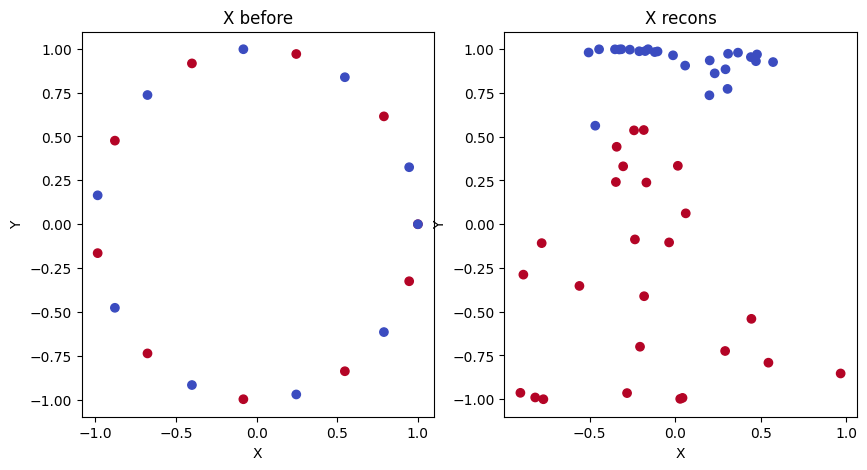

In [ ]:
#m=50 and used two losses 
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot the first data set on the first axis
axs[0].scatter(data[:,0], data[:,1], c=labels,cmap='coolwarm')
axs[0].set_title('X before')

# plot the second data set on the second axis
axs[1].scatter(x_recons[:,0].detach().numpy(), x_recons[:,1].detach().numpy(), c=y,cmap='coolwarm')
axs[1].set_title('X recons')

# add labels to the x and y axes of both subplots
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# show the plot
plt.show()

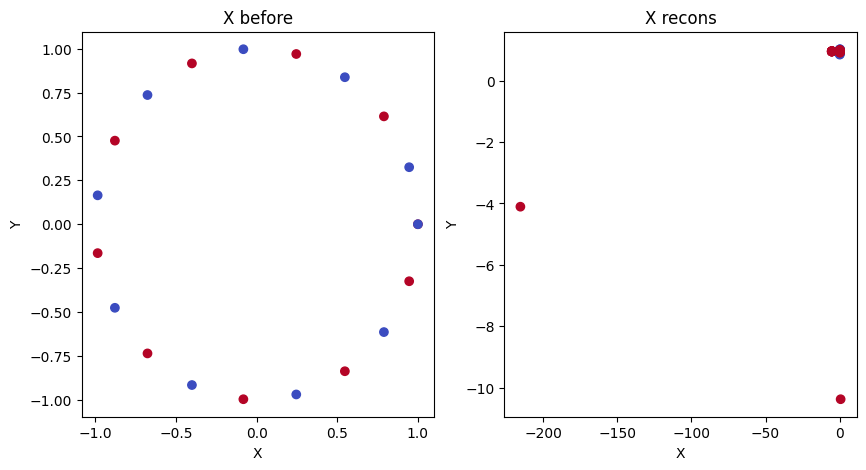

In [ ]:
#m=50 and used one loss
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot the first data set on the first axis
axs[0].scatter(data[:,0], data[:,1], c=labels,cmap='coolwarm')
axs[0].set_title('X before')

# plot the second data set on the second axis
axs[1].scatter(x_recons[:,0].detach().numpy(), x_recons[:,1].detach().numpy(), c=y,cmap='coolwarm')
axs[1].set_title('X recons')

# add labels to the x and y axes of both subplots
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# show the plot
plt.show()

In [ ]:
print(l.shape,y.shape,values.shape)

torch.Size([100]) (20,) torch.Size([100])


In [ ]:
l.dim()

1

In [ ]:
def get_kkt_loss(values, l, y, model):
    l = l.squeeze()
    # all three shape should be (n)
    assert values.dim() == 1
    assert l.dim() == 1
    assert y.dim() == 1
    assert values.shape == l.shape == y.shape

    output = values * l * y
    grad = torch.autograd.grad(
        outputs=output,
        inputs=model.parameters(),
        grad_outputs=torch.ones_like(output, requires_grad=False, device=output.device).div(500),
        create_graph=True,
        retain_graph=True,
    )
    kkt_loss = 0

    for i, (p, grad) in enumerate(zip(model.parameters(), grad)):
        assert p.shape == grad.shape
        l = (p.detach().data - grad).pow(2).sum()
        kkt_loss += l
    return kkt_loss

In [ ]:
kkt_loss=get_kkt_loss(values,l,y,model)

In [ ]:
kkt_loss

tensor(2020.0847, dtype=torch.float64, grad_fn=<AddBackward0>)

In [ ]:
def get_verify_loss(x, l):
    loss_verify = 0
    loss_verify += 1 * (x - 1).relu().pow(2).sum()
    loss_verify += 1 * (-1 - x).relu().pow(2).sum()
    loss_verify += 5 * (-l + 0.4983026413803425).relu().pow(2).sum()
    return loss_verify

In [ ]:
loss_verify=get_verify_loss(x_recons,l)

In [ ]:
for epoch in range(50000):
        values = model(x_recons.to(device)).squeeze()
        kkt_loss, loss_verify =get_kkt_loss(values.to(device),l.to(device),y.to(device),model.to(device)),get_verify_loss(x_recons,l)
        loss=kkt_loss #+loss_verify
        if np.isnan(kkt_loss.item()):
            raise ValueError('Optimizer diverged during extraction')
        opt_x_recons.zero_grad()
        opt_l.zero_grad()
        loss.backward()
        opt_x_recons.step()
        opt_l.step()
        if(epoch%1000==0):
          print(epoch," ",kkt_loss," ",loss)
        

0   tensor(2176.6885, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)   tensor(2176.6885, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
1000   tensor(2176.6757, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)   tensor(2176.6757, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
2000   tensor(2176.6792, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)   tensor(2176.6792, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
3000   tensor(2176.6877, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)   tensor(2176.6877, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
4000   tensor(2176.6875, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)   tensor(2176.6875, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
5000   tensor(2176.6877, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)   tensor(2176.6877, device='cuda:0', dtype=torch.float64, grad_fn=<AddB